# SOAL BASIC (50 POIN)

1. **Jelaskan mengapa proses matching perlu dilakukan ketika ingin mengukur dampak dari suatu treatment pada propensity score modeling?**


Dalam sebuah experiment causal analisis, ada banyak confounders, yaitu variabel yang mempengaruhi treatment dan juga outcome (misal gender, umur, jumlah transaksi). Matching dalam hal ini dimaksud untuk mengurangi confounders tersebut. sehingga dipilihlah sample-sample data yang identik (memiliki kemiripan). sehingga meminimalisir difference antara sample treatment dan sample control nya.


2. **Sebelum adanya Double ML, peneliti machine learning menggunakan metode Double Selection untuk menguji efek dari treatment. Namun pada akhirnya Double Machine Learning digunakan karena lebih baik dibandingkan dengan Double Selection. Jelaskan mengapa Double ML lebih baik digunakan ketimbang Double Selection? Masalah apa yang ada pada Double Selection yang dapat diselesaikan dengan Double ML?**

Double Mechine Learning menghandle lebih dulu treatment effect dari potensial confounders yang bersifat heterogen. Double ML lebih unggul dalam causal analisis karena mengoreksi bias yang disebabkan dua sumber, bias regularisasi dan bias karena overfitting. 

**3. Ada banyak metrik yang dapat digunakan untuk mengukur dampak dari suatu variabel: ATE, CATE, dan LATE. Jelaskan kapan masing-masing metrik digunakan!**



*   ATE: Average Treatment Effect 
Rata-rata (nilai harapan effect) dari treatment , ATE ini digunakan bila variabel control sudah benar-benar identik. 

*   CATE : Conditional Average Treatment Effect, kalau ini dipakai ketika ada kondisi-kondisi tertentu yang dibandingkan antara variabel control sehingga mempengaruhi treatment. misal ketika ingin mengukur apakah rokok mempengaruhi kanker. dan ingin menganalisa apakah hasil treatment itu berbeda antara usia muda dan usia tua sehingga akan dihitung dulu rata-rata treatment untuk perokok usia muda dan rata-rata treatment untuk usia tua

*   ATT : Average Treatment Effect on the Treated
ATT ini ketika ingin mengetahui effect hanya pada variabel diberikan treatment saja. jadi hanya menghitung rata-rata dari effect sample yang diberikan treatment


4.** Berikut adalah pertanyaan open-ended, akan dinilai berdasarkan argumentasi yang memiliki landasan. Kita dapat mengekstrak knowledge dari model dengan menggunakan interpretable machine learning. Namun kita juga dapat menggunakan metode seperti double ML untuk mendapatkan pola sebab-akibat berdasarkan data generation process. Mana metode yang lebih baik untuk menjelaskan dampak dari akibat? Kapan metode interpretable machine learning dapat digunakan untuk analisis kausal?**

Double Machine Learning dipakai ketika type treatment nya discrete atau continuous, discrete di sini hanya dipakai 2 class saja (berbentuk binari), dan Double ML juga digunakan ketika seluruh confounders akan diobservasi pengaruh dan effect nya. Sehingga dibanding IML, double ML lebih unggul dalam causal analysis.

# SOAL ADVANCE (50 Poin)

Beberapa peneliti dari The National Study of Learning Mindset melakukan penelitian eksperimen acak yang dilakukan ke siswa SMA di seluruh Amerika Serikat untuk membuktikan bahwa mengajarkan growth mindset pada mereka akan meningkatkan prestasi akademis. Dua grup dibentuk dimana satu grup diberikan seminar tentang growth mindset sedangkan yang lainnya tidak. Selanjutnya akan diukur bagaimana prestasi mereka secara akademik.

In [ ]:
!pip install psmpy==0.2.8
!pip install pycausalimpact

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# load data wrangling package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# statsmodels for linear/logistic regression and Granger causality test
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests

# psmpy for propensity score modeling and plotting
from psmpy import PsmPy
from psmpy.functions import cohenD
from psmpy.plotting import *

# causalimpact for intervention analysis
from causalimpact import CausalImpact

In [ ]:
data_school = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/learning_mindset/learning_mindset.csv")

In [ ]:
data_school.head()

,schoolid,intervention,achievement_score,success_expect,ethnicity,gender,frst_in_family,school_urbanicity,school_mindset,school_achievement,school_ethnic_minority,school_poverty,school_size
0,76,1,0.277359,6,4,2,1,4,0.334544,0.648586,-1.310927,0.224077,-0.426757
1,76,1,-0.449646,4,12,2,1,4,0.334544,0.648586,-1.310927,0.224077,-0.426757
2,76,1,0.769703,6,4,2,0,4,0.334544,0.648586,-1.310927,0.224077,-0.426757
3,76,1,-0.121763,6,4,2,0,4,0.334544,0.648586,-1.310927,0.224077,-0.426757
4,76,1,1.526147,6,4,1,0,4,0.334544,0.648586,-1.310927,0.224077,-0.426757


In [ ]:
# dari data ini variabel treatment nya adalah intervention, dengan variabel target achievment_score
# sedangkan untuk covariate, kita akan mengecek dulu manakah variabel lain yang punya berkorelasi kuat dengan variabel target.
data_school.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10391 entries, 0 to 10390
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   schoolid                10391 non-null  int64  
 1   intervention            10391 non-null  int64  
 2   achievement_score       10391 non-null  float64
 3   success_expect          10391 non-null  int64  
 4   ethnicity               10391 non-null  int64  
 5   gender                  10391 non-null  int64  
 6   frst_in_family          10391 non-null  int64  
 7   school_urbanicity       10391 non-null  int64  
 8   school_mindset          10391 non-null  float64
 9   school_achievement      10391 non-null  float64
 10  school_ethnic_minority  10391 non-null  float64
 11  school_poverty          10391 non-null  float64
 12  school_size             10391 non-null  float64
dtypes: float64(6), int64(7)
memory usage: 1.0 MB


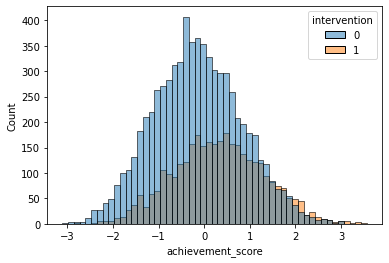

In [ ]:
# di bawah ini grafik persebaran score_achievment siswa yang diberi intervensi dengan yang tidak diberi intervensi 
# disribusi score untuk siswa yang diberi intervensi growth mindset tidak terlalu bergeser ke kanan dari distribusi dibanding grafik intervention nol.
# angka achievement score di atas 1 grafiknya landai untuk intervention 1, artinya jumlah siswa yang diberi growth mindset dan memiliki score bagus berjumlah tidak terlalu banyak (50-100 orang)
# namun meskipun kecil tetap ada pergeseran, sehingga kita akan menganalisa apakah penyebab score yang meningkat ini karena adanya intervensi.
sns.histplot(data=data_school, x="achievement_score", hue="intervention")

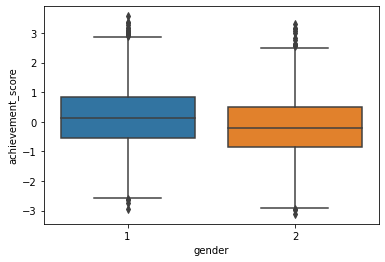

In [ ]:
# kalau dilihat dari box plot di bawah achievement juga tidak terlalu berbeda nilai tengahnya antara gender female dan male
sns.boxplot(data=data_school, y="achievement_score",  x="gender")

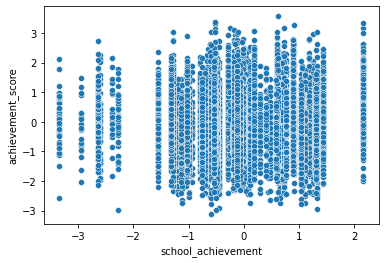

In [ ]:
# untuk school_achievement juga tidak berkorelasi dengan achievement_score. 
sns.scatterplot(data=data_school, y="achievement_score",  x="school_achievement")

In [ ]:
# untuk melihat korelasi antar variabel lainnya kita cek dengan bagan korelasi pearson
# achievment_score cukup ada korelasi positif dengan success_expect
corr=data_school.corr()
corr.style.background_gradient(cmap='coolwarm')

,schoolid,intervention,achievement_score,success_expect,ethnicity,gender,frst_in_family,school_urbanicity,school_mindset,school_achievement,school_ethnic_minority,school_poverty,school_size
schoolid,1.000000,-0.004182,-0.078337,0.029178,0.032320,0.006494,-0.085124,0.141227,0.000552,0.044772,-0.229099,0.121768,0.079114
intervention,-0.004182,1.000000,0.221328,0.058764,-0.006491,-0.025457,-0.045140,0.005762,-0.046095,0.027903,-0.002262,-0.011672,0.034252
achievement_score,-0.078337,0.221328,1.000000,0.438577,0.000139,-0.159343,-0.130520,0.051367,-0.110801,0.021556,0.056961,0.013696,0.059052
success_expect,0.029178,0.058764,0.438577,1.000000,-0.033818,-0.043800,-0.149084,-0.029627,-0.054207,0.074006,-0.079199,-0.052548,0.047694
ethnicity,0.032320,-0.006491,0.000139,-0.033818,1.000000,-0.017338,-0.009889,-0.000911,0.008969,0.009208,-0.040645,-0.009580,-0.033485
gender,0.006494,-0.025457,-0.159343,-0.043800,-0.017338,1.000000,0.000372,0.008840,0.015976,0.001371,0.002369,0.005535,0.005958
frst_in_family,-0.085124,-0.045140,-0.130520,-0.149084,-0.009889,0.000372,1.000000,0.030136,0.201116,-0.216939,0.153095,0.066207,-0.183997
school_urbanicity,0.141227,0.005762,0.051367,-0.029627,-0.000911,0.008840,0.030136,1.000000,0.214805,-0.201385,0.214983,0.401507,0.123807
school_mindset,0.000552,-0.046095,-0.110801,-0.054207,0.008969,0.015976,0.201116,0.214805,1.000000,-0.573798,0.253989,0.262739,-0.492287
school_achievement,0.044772,0.027903,0.021556,0.074006,0.009208,0.001371,-0.216939,-0.201385,-0.573798,1.000000,-0.478682,-0.423915,0.478073


In [ ]:
# terlihat data imbalance antara jumlah siswa yang diberi intervention dan yang tidak
data_school.groupby('intervention').agg({
    'intervention': 'count',
    'achievement_score': 'mean'
})

,intervention,achievement_score
intervention,,
0,7007,-0.153803
1,3384,0.318469


In [ ]:
# Propencity Score Matching
# tambahkan kolom index
data_school["id"] = data_school.index

In [ ]:
data_school.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10391 entries, 0 to 10390
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   schoolid                10391 non-null  int64  
 1   intervention            10391 non-null  int64  
 2   achievement_score       10391 non-null  float64
 3   success_expect          10391 non-null  int64  
 4   ethnicity               10391 non-null  int64  
 5   gender                  10391 non-null  int64  
 6   frst_in_family          10391 non-null  int64  
 7   school_urbanicity       10391 non-null  int64  
 8   school_mindset          10391 non-null  float64
 9   school_achievement      10391 non-null  float64
 10  school_ethnic_minority  10391 non-null  float64
 11  school_poverty          10391 non-null  float64
 12  school_size             10391 non-null  float64
 13  id                      10391 non-null  int64  
dtypes: float64(6), int64(8)
memory usage: 

In [ ]:
data_school.head(1)

,schoolid,intervention,achievement_score,success_expect,ethnicity,gender,frst_in_family,school_urbanicity,school_mindset,school_achievement,school_ethnic_minority,school_poverty,school_size,id
0,76,True,0.277359,6,4,2,1,4,0.334544,0.648586,-1.310927,0.224077,-0.426757,0


In [ ]:
# Propensity Score Matching dipilih untuk meminimalisir variabel confounder yang saling berkorelasi
# success_expect dipilih karena biasanya espektasi menjadikan motivasi seseorang mencapai achievement
# first_in_family juga bisa dijadikan motivasi dan causal seseorang gigih mendapatkan score bagus
# school urban, school achievement, school poverty dipilih karena branding sekolah yang bagus sejalan dengan support sekolah agar score muridnya juga bagus begitu juga sebaliknya. 
# jadi setiap data harus ada kecocokan dalam semua variabel ini. Selain itu akan ditake out.

psm = PsmPy(
    data_school, 
    treatment = "intervention", 
    indx="id",
    exclude=["achievement_score", "schoolid","school_mindset","ethnicity","school_ethnic_minority","gender","school_size"]
)

In [ ]:
psm.logistic_ps(balance=True) 

In [ ]:
psm.predicted_data


,id,success_expect,frst_in_family,school_urbanicity,school_achievement,school_poverty,propensity_score,propensity_logit,intervention
0,0,6,1,4,0.648586,0.224077,0.537328,0.149591,1
1,1,4,1,4,0.648586,0.224077,0.488629,-0.045493,1
2,2,6,0,4,0.648586,0.224077,0.569151,0.278390,1
3,3,6,0,4,0.648586,0.224077,0.569151,0.278390,1
4,4,6,0,4,0.648586,0.224077,0.569151,0.278390,1
...,...,...,...,...,...,...,...,...,...
10386,10386,7,1,3,-1.129889,1.005063,0.582511,0.333090,0
10387,10387,7,1,3,-1.129889,1.005063,0.582511,0.333090,0
10388,10388,2,1,3,-1.129889,1.005063,0.246642,-1.116601,0
10389,10389,5,1,3,-1.129889,1.005063,0.438615,-0.246786,0


In [ ]:
psm.knn_matched(matcher='propensity_logit', replacement=True, caliper=None)

X has feature names, but NearestNeighbors was fitted without feature names


In [ ]:
# ada 3384 id yang memiliki nilai Propensity yang sama
psm.matched_ids

,id,matched_ID
0,0,9355
1,1,6343
2,2,8611
3,3,8611
4,4,8611
...,...,...
3379,3379,6863
3380,3380,3462
3381,3381,5462
3382,3382,6087


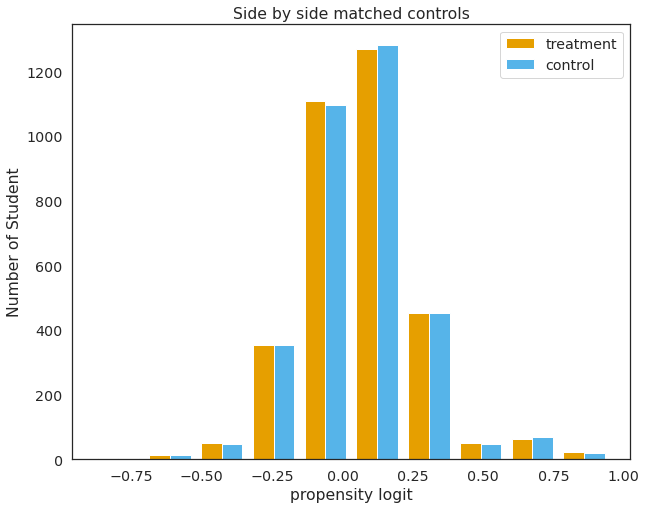

In [ ]:
# Plot Hasil Match
psm.plot_match(
    Ylabel = 'Number of Student',
    save = False
)

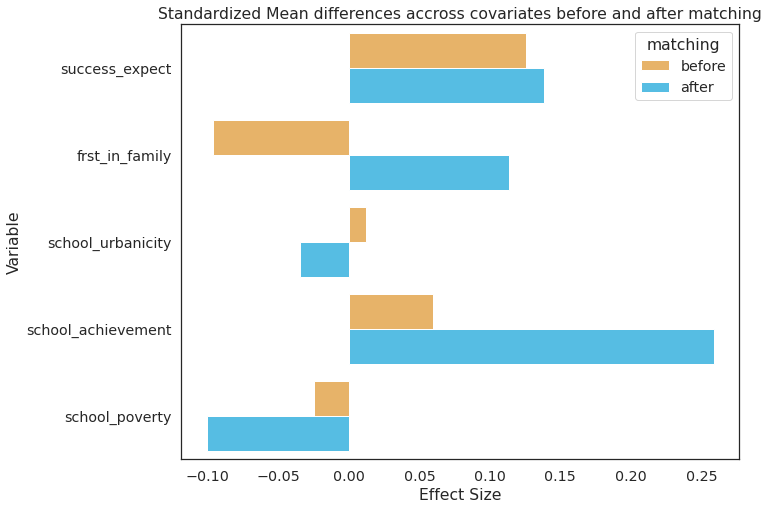

In [ ]:
# Check Effect Size dari Covariate

psm.effect_size_plot(save=False)

Use Cohen effect size table to identify if the effect is ignorable or not.

![](https://www.researchgate.net/profile/Maximus-Tamur/publication/348779341/figure/tbl1/AS:984225121591298@1611668963429/Cohens-effect-size-classification.png)

In [ ]:
psm.df_matched.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6768 entries, 0 to 6767
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  6768 non-null   int64  
 1   success_expect      6768 non-null   int64  
 2   frst_in_family      6768 non-null   int64  
 3   school_urbanicity   6768 non-null   int64  
 4   school_achievement  6768 non-null   float64
 5   school_poverty      6768 non-null   float64
 6   propensity_score    6768 non-null   float64
 7   propensity_logit    6768 non-null   float64
 8   intervention        6768 non-null   int64  
dtypes: float64(4), int64(5)
memory usage: 476.0 KB


In [ ]:
data_school.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10391 entries, 0 to 10390
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   schoolid                10391 non-null  int64  
 1   intervention            10391 non-null  int64  
 2   achievement_score       10391 non-null  float64
 3   success_expect          10391 non-null  int64  
 4   ethnicity               10391 non-null  int64  
 5   gender                  10391 non-null  int64  
 6   frst_in_family          10391 non-null  int64  
 7   school_urbanicity       10391 non-null  int64  
 8   school_mindset          10391 non-null  float64
 9   school_achievement      10391 non-null  float64
 10  school_ethnic_minority  10391 non-null  float64
 11  school_poverty          10391 non-null  float64
 12  school_size             10391 non-null  float64
 13  id                      10391 non-null  int64  
dtypes: float64(6), int64(8)
memory usage: 

In [ ]:
matched_data = pd.merge(psm.df_matched, data_school[['id', 'achievement_score']], how = 'inner')

In [ ]:
matched_data

,id,success_expect,frst_in_family,school_urbanicity,school_achievement,school_poverty,propensity_score,propensity_logit,intervention,achievement_score
0,0,6,1,4,0.648586,0.224077,0.537328,0.149591,1,0.277359
1,1,4,1,4,0.648586,0.224077,0.488629,-0.045493,1,-0.449646
2,2,6,0,4,0.648586,0.224077,0.569151,0.278390,1,0.769703
3,3,6,0,4,0.648586,0.224077,0.569151,0.278390,1,-0.121763
4,4,6,0,4,0.648586,0.224077,0.569151,0.278390,1,1.526147
...,...,...,...,...,...,...,...,...,...,...
6763,3462,6,0,4,0.648586,0.224077,0.478374,-0.086557,0,0.711945
6764,3462,6,0,4,0.648586,0.224077,0.478374,-0.086557,0,0.711945
6765,3462,6,0,4,0.648586,0.224077,0.478374,-0.086557,0,0.711945
6766,3462,6,0,4,0.648586,0.224077,0.478374,-0.086557,0,0.711945


# Modeling with Propensity Score

In [ ]:
Y = matched_data['achievement_score']
X = matched_data['intervention']
weight = matched_data['propensity_score']

In [ ]:
X = sm.add_constant(X)

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only


In [ ]:
# Define and fit model
# define model
model = sm.WLS(Y, X, weights = weight)

# fit model
result = model.fit()

In [ ]:
# nilai p value < 0.05 berrti ada impact intervensi terhadap peningkatan Achievment score
# dari sumary ini terlihat causal impact intervensi growth mindset  terhadap peningkatan Achievement hanya sebesar 0.4%
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:      achievement_score   R-squared:                       0.040
Model:                            WLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     283.9
Date:                Sat, 03 Sep 2022   Prob (F-statistic):           1.96e-62
Time:                        15:47:07   Log-Likelihood:                -9712.5
No. Observations:                6768   AIC:                         1.943e+04
Df Residuals:                    6766   BIC:                         1.944e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0673      0.017     -3.860      0.000      -0.101      -0.033
intervention     0.4154      0.025     16.849      0.000       0.367       0.464
==============================================================================
Omnibus:                      105.566   Durbin-Watson:                   0.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.225
Skew:                           0.234   Prob(JB):                     5.71e-21
Kurtosis:                       2.667   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""